# Coursework 1 - Mathematics for Machine Learning

***

## Exercise 1: Quick questions [3 points]

#### Question 1:

For a given hypothesis $f$, the risk of $f$ is its expected loss taken under the underlying distribution of the data, i.e. $R(f)=\mathbb{E}_{D}[L(f(\mathbf{x}),\mathbf{y})]$. Since the underlying distribution $D$ is unknown, we can approximate the true risk using empirical data. Under the assumption that our data points are i.i.d samples taken from $D$, we define the empirical risk as the average loss over all our data points, i.e. $\hat{R}(f)=\frac{1}{N} \sum_{i=1}^{N} L(f(\mathbf{x}^{i}),\mathbf{y}^{i})$.

#### Question 2:

When training a model $f$ on data $(\mathbf{x},\mathbf{y})$, the training error respresents the difference between the model output $f(\mathbf{x}^i)$ and the (output) data $\mathbf{y}^{i}$ it was trained using. The generalization error refers to unseen data $(\mathbf{\tilde{x}},\mathbf{\tilde{y}})$ that the model was not trained on; it represents the difference between the data $\mathbf{\tilde{y}}^{i}$ and the predictions $f(\mathbf{\tilde{x}}^i)$ generated by the model on the unseen data. We aim to minimise the generalization error.

#### Question 3:

In the proof of the inequality we have $e^{-t \varepsilon} \mathbb{E}[e^{t(S_{m}-\mathbb{E}[S_{m}])}] = e^{-t \varepsilon} \mathbb{E}[\prod_{i=1}^{m}e^{t(X_{i}-\mathbb{E}[X_{i}])}] \stackrel{(1)}{=} e^{-t \varepsilon} \prod_{i=1}^{m} e^{t(X_{i}-\mathbb{E}[X_{i}])}$ where the step (1) is a consequence of the independence of $X_{i}$: the expectation of a product factorises into a product of expectations under the condition of independence.

#### Question 4:

- Split the dataset into 3 portions, one for training, one for validation, and one for testing. (An example split would be 80:10:10.)
- We use the training dataset to train the first model using regressors from $\mathcal{H}_1$ and the second model using $\mathcal{H}_2$ - we use the same data to train both models so that we are able to compare the hypothesis classes without being impacted by the difference in training data used.
- We can train multiple models with different hyperparameters on the training set and choose the hyperparameters from the model that performs the best on the validation set (for both hypothesis classes).
- Then we can see if our models generalise well to unseen data by testing the best performing model from $\mathcal{H}_1$ and the best performing model from $\mathcal{H}_2$ on the same testing set. Again, using the same testing set ensures our comparison of the generalisation error using $\mathcal{H}_1$ or $\mathcal{H}_2$ is not dependent on the data used.

#### Question 5:

The generalisation bounds in section 1.4 only apply to a fixed hypothesis or a finite hypotheisis class. Rademacher complexity allows us to understand how large hypothesis classes are even if they are of infinite cardinality. This is  important since the majority of classes we consider are infinite, e.g. linear models: $\mathcal{H} = \{ h_w (x) = \mathbf{w}^T \mathbf{x} + \mathbf{b} : ||\mathbf{w}|| \leq 1\}$ is infinite since we can choose infinitely many parameters $\mathbf{w}$ and $\mathbf{b}$.

Since Rademacher complexity tests how well elements of the hypothesis class can fit to random noise, it gives a measure of how rich the hypothesis class is. The generalisation bounds however simply bound the true risk using the empirical risk and do not consider the richness of the hypothesis class.

#### Question 6:

$\beta^{k+1} = \beta^{k} + \alpha_{k} \theta_{k}$ where $ \theta_{k} = -\Big(\nabla f(\beta^k)+\eta \theta_{k-1}\Big)$.

We start with looking at the convex setting. Since the update step for $\beta^{k}$ also considers the previous step, we can intuitively think of the path of $\beta^k$ as the path traced by a weighted ball rolling around a valley with different contours. If the ball goes down a steep section of the valley, it will gain momentum and its future displacement will have a greater component in that direction. If it then goes does a less steep/flatter region, the ball's momentum will cause it to travel down this steep region faster. So rather than 'zig-zagging' in the successive directions of steepest descent (which could lead to a very indirect path to the minimum), the ball's momentum will cause us to have a faster rate of convergence than regular GD.

In a non-convex setting, the ball will have enough momentum to keep travelling over any small mounds (local maxima) or through small ditches (local minima) or in the valley, whereas regular GD with a poorly chosen learning rate could mean we get trapped at a local minimum. As such we might be able to get convergence with momentum where we could not with regular GD.

***
***

## Exercise 2: Statistical learning theory [7 points]


### Question 1 [1 point]


$\begin{align*}
    f_{S_1,k} &\in \underset{f\in \mathcal{F}_k}{\operatorname{argmin}} \frac{1}{S_1} \sum_{i=1}^{|S_{1}|} L(f(\mathbf{x}^{i}),\mathbf{y}^{i}) \\
    &= \frac{1}{(1-\alpha)N} \underset{f\in \mathcal{F}_k}{\operatorname{argmin}} \sum_{i=1}^{(1-\alpha)N} L(f(\mathbf{x}^{i}),\mathbf{y}^{i})
\end{align*}$

***

### Question 2 [1 point]

The result follows by the application of the union bound.

Note that the event in the LHS probability is a subset of a union of events: $\big\{ \sup_{k \geq 1}|\mathcal{R}(f_{S_1,k})-\mathcal{\hat{R}}_{S_2}(f_{S_1,k})| > \varepsilon \big\} \subseteq \bigcup_{k \geq 1} \big\{ |\mathcal{R}(f_{S_1,k})-\mathcal{\hat{R}}_{S_2}(f_{S_1,k})| \geq \varepsilon \big\}$.

For some justifiction of the above statement, define $A := \big\{ \sup_{k \geq 1}|\mathcal{R}(f_{S_1,k})-\mathcal{\hat{R}}_{S_2}(f_{S_1,k})| > \varepsilon \big\}$, $B := \bigcup_{k \geq 1} \big\{ |\mathcal{R}(f_{S_1,k})-\mathcal{\hat{R}}_{S_2}(f_{S_1,k})| \geq \varepsilon \big\}$, $N(k) := |\mathcal{R}(f_{S_1,k})-\mathcal{\hat{R}}_{S_2}(f_{S_1,k})|$ and $C := \{N(k) : k \geq 1 \}$. In $A$ we require the least upper bound of $C$ to exceed $\varepsilon$. In $B$ we require at least one element of $C$ to be greater than or equal to $\varepsilon$. If the least upper bound is attained then $A = B$. If the least upper bound is not attained, then any element of $C$ is strictly smaller than the least upper bound. Therefore if the least upper bound is greater than $\varepsilon$, at least one element of $C$ will be greater than equal to $\varepsilon$ also (being unable to such an element contradicts the least upper bound property), meaning $A \subseteq B$.

(Aside: A deterministic counterexample showing $B \not\subseteq A$ could be $N(k) = 5 - \frac{1}{k}$. With $\varepsilon = 4.9$ we have $N(10) = 4.9 \geq \varepsilon = 4.9$ but $\sup_{k \geq 1} C = 5 \not> \varepsilon = 4.9$.)

<br>

Applying the union bound yields

$ \begin{align*}
  \mathbb{P}\big(\sup_{k \geq 1}|\mathcal{R}(f_{S_1,k})-\mathcal{\hat{R}}_{S_2}(f_{S_1,k})| > \varepsilon\big) &\leq \mathbb{P}\big( \bigcup_{k \geq 1} \big\{ |\mathcal{R}(f_{S_1,k})-\mathcal{\hat{R}}_{S_2}(f_{S_1,k})| \geq \varepsilon \big\} \big) \\
   &\leq \sum_{k \geq 1}\mathbb{P}\big(|\mathcal{R}(f_{S_1,k})-\mathcal{\hat{R}}_{S_2}(f_{S_1,k})| \geq \varepsilon\big)
\end{align*}$

as required.

***

### Question 3 [1 point]

Using the law of total expectation/tower property of conditional expectation we have

$\begin{align*}
    \mathbb{P}(A) &= \mathbb{E}[\mathbb{1}_{A}] \\
    &= \mathbb{E}[\mathbb{E}[\mathbb{1}_{A} | S_{1}]] \\
    &= \mathbb{E}[\mathbb{P}(A | S_{1})].
\end{align*}
$

We apply this with $A=\{|\mathcal{R}(f_{S_1,k})-\mathcal{\hat{R}}_{S_2}(f_{S_1,k})| \geq \varepsilon \}$ yielding

$ \mathbb{P} \big(|\mathcal{R}(f_{S_1,k})-\mathcal{\hat{R}}_{S_2}(f_{S_1,k}) \ | \geq \varepsilon \big) = \mathbb{E} \big[\mathbb{P}\big(|\mathcal{R}(f_{S_1,k})-\mathcal{\hat{R}}_{S_2}(f_{S_1,k}) \ | \geq \varepsilon \ | \ S_{1}\big)\big]$ as required.

***

### Question 4 [1 point]

By definition we have the true risk of the ERM as $\mathcal{R}(f_{S_1,k}) = \mathbb{E}_{D}[L(f_{S_1,k}(\mathbf{x}),\mathbf{y})]$ and the empirical risk as $\mathcal{\hat{R}}_{S_2}(f_{S_1,k}) = \frac{1}{|S_2|} \sum_{i=1}^{|S_2|} L(f_{S_1,k}(\mathbf{x}^i),\mathbf{y}^i) = \frac{1}{\alpha N} \sum_{i=1}^{\alpha N} L(f_{S_1,k}(\mathbf{x}^i),\mathbf{y}^i)$. Note that in the second expression we take the empirical risk over all samples in $S_2$ of the ERM calculated over samples in $S_1$.

We have the probability of an event conditioned on $S_1$ in $\mathbb{P}(|\mathcal{R}(f_{S_1,k})-\mathcal{\hat{R}}_{S_2}(f_{S_1,k})| \geq \varepsilon | S_{1})$. The key point is that once we condition on $S_1$, the hypothesis $f_{S_1,k}$ (the ERM over $S_1$) becomes deterministic. As such all the stochasticity/randomness in this expression lies in ${S_2}$ and we can apply Corollary 1.15:

$\begin{align*}
    \mathbb{P}_{S_2 \sim D^{|S_2|}} \big( |\mathcal{R}(f_{S_1,k})-\mathcal{\hat{R}}_{S_2}(f_{S_1,k})| \geq \varepsilon | S_{1} \big) &\leq 2 \exp(-2 \cdot |S_{2}| \cdot {\varepsilon}^2) \\
    &= 2 \exp(-2 \alpha N {\varepsilon}^2).
\end{align*}$

Vitally $S_1$ and $S_2$ are sampled from the same distribution $D$.

***

### Question 5 [1 point]

By question 4 (more specifically substituting $\varepsilon + \sqrt{\frac{\log{k}}{\alpha N}}$ for $\varepsilon$ in the result from question 4) we yield

$\begin{align*}
    \mathbb{P}\big(|\mathcal{R}(f_{S_1,k})-\mathcal{\hat{R}}_{S_2}(f_{S_1,k})| \geq \varepsilon + \sqrt{\frac{\log{k}}{\alpha N}} | S_{1}\big) &\leq 2 \exp \left(-2 \alpha N \cdot \left[ {\varepsilon + \sqrt{\frac{\log{k}}{\alpha N}}} \right]^2 \right) \\
    &= 2 \exp \left( -2 \alpha N \cdot \left[ {\varepsilon}^2 + 2 \varepsilon \sqrt{\frac{\log{k}}{\alpha N}} + \frac{\log{k}}{\alpha N} \right] \  \right) \\
    &\leq 2 \exp \left( -2 \alpha N \cdot \left[ {\varepsilon}^2 + \frac{\log{k}}{\alpha N} \right] \right) \\
    &= 2 \exp \left( -2 \alpha N {\varepsilon}^2 -2  \log{k} \right) \\
    &= 2 \exp \left( -2 \alpha N {\varepsilon}^2 \right) \cdot \exp \left( -2 \log k \right) \\
    &= 2 \exp \left( -2 \alpha N {\varepsilon}^2 \right) \cdot k^{-2} \\
    &= \frac{2}{k^2} \exp \left( -2 \alpha N {\varepsilon}^2 \right)
\end{align*}$

where the 3rd line follows from the fact that $-4 \alpha N \varepsilon \sqrt{\frac{\log k}{\alpha N}} \leq 0$ and the exponential function is increasing.

***

### Question 6 [1 point]

$\begin{align}
    \mathbb{P} \left( \sup_{k \geq 1} \left\{ | \mathcal{R}(f_{S_1,k})-\mathcal{\hat{R}}_{S_2}(f_{S_1,k}) - \sqrt{\frac{\log k}{\alpha N}}| \right\} > \varepsilon \right) &\leq \sum_{k=1}^{\infty} \mathbb{P} \left( | \mathcal{R}(f_{S_1,k})-\mathcal{\hat{R}}_{S_2}(f_{S_1,k}) - \sqrt{\frac{\log k}{\alpha N}}| \geq \varepsilon \right) \\
    &= \sum_{k=1}^{\infty} \mathbb{E} \left[ \mathbb{P} \left(| \mathcal{R}(f_{S_1,k})-\mathcal{\hat{R}}_{S_2}(f_{S_1,k}) - \sqrt{\frac{\log k}{\alpha N}}|  \geq \varepsilon \ \big| \ S_1 \right) \right] \\
    &\leq \sum_{k=1}^{\infty} \mathbb{E} \left[ \frac{2}{k^2} \exp{-2 \alpha N {\varepsilon}^2} \right] \\
    &= \sum_{k=1}^{\infty} \frac{2}{k^2} \exp(-2 \alpha N {\varepsilon}^2) \\
    &= 2 \exp(-2 \alpha N {\varepsilon}^2) \cdot \sum_{k=1}^{\infty} \frac{1}{k^2} \\
    &= 2 \exp(-2 \alpha N {\varepsilon}^2) \cdot \frac{\pi^2}{6} \\
    &= \frac{\pi^2}{3} \exp(-2 \alpha N {\varepsilon}^2) \\
    &\leq 4 \exp(-2 \alpha N {\varepsilon}^2)
\end{align} \\
$

where line 1 follows from the result in question 2 and line 2 follows from the law of total expectation. Line 3 follows from question 5 and the fact that the expectation, as an integral, preserves inequalities. The final line follows since $\pi^2 \leq 12 $.

***

### Question 7 [1 point]

For any given choice of $k$ we have

$$\mathbb{P} \left(| \mathcal{R}(f_{S_1,k})-\mathcal{\hat{R}}_{S_2}(f_{S_1,k}) - \sqrt{\frac{\log k}{\alpha N}}| \geq \varepsilon \right) \leq \mathbb{P} \left( \sup_{k \geq 1} \left\{ | \mathcal{R}(f_{S_1,k})-\mathcal{\hat{R}}_{S_2}(f_{S_1,k}) - \sqrt{\frac{\log k}{\alpha N}}| \right\} > \varepsilon \right)$$

by definition of the supremum. We also can apply result from question 6, which means $\forall \ \varepsilon > 0$ we have

$\begin{align}
    \mathbb{P} \left(| \mathcal{R}(f_{S_1,k})-\mathcal{\hat{R}}_{S_2}(f_{S_1,k}) - \sqrt{\frac{\log k}{\alpha N}}| \geq \varepsilon \right) &\leq \mathbb{P} \left( \sup_{k \geq 1} \left\{ | \mathcal{R}(f_{S_1,k})-\mathcal{\hat{R}}_{S_2}(f_{S_1,k}) - \sqrt{\frac{\log k}{\alpha N}}| \right\} > \varepsilon \right) \\
    &\leq 4 e^{-2 \alpha N {\varepsilon}^2}
\end{align}$

<br>

The above holds for all choices of k; with k as $\tilde{k}$ we have $f_{S_1,k} = \tilde{f_{S_2}}$ by definition. The above also holds for all $\varepsilon > 0$. As such define $\delta$ by $\delta = 4 e^{-2 \alpha N {\varepsilon}^2} \iff \varepsilon = \sqrt{\frac{\log \frac{4}{\delta}}{2 \alpha N}}$.  Since $\varepsilon \in (0,\infty)$ we know $\delta \in (0,1)$ since $2 \alpha N {\varepsilon}^2 \in (0,\infty)$ and the exponential function is strictly bounded by 0 and 1 for $x \in (0,\infty)$. Therefore, for all $\delta \in (0,1)$ we have

$\mathbb{P} \left(| \mathcal{R}(\tilde{f_{S_2}})-\mathcal{\hat{R}}_{S_2}(\tilde{f_{S_2}}) - \sqrt{\frac{\log \tilde{k}}{\alpha N}}| \geq \sqrt{\frac{\log \frac{4}{\delta}}{2 \alpha N}} \right) \leq \delta$.

<br>

We have an event which occurs with probability at most $\delta$. Therefore the complement of the event occurs with probability at least $1-\delta$:

$\mathbb{P} \left(| \mathcal{R}(\tilde{f_{S_2}})-\mathcal{\hat{R}}_{S_2}(\tilde{f_{S_2}}) - \sqrt{\frac{\log \tilde{k}}{\alpha N}}| < \sqrt{\frac{\log \frac{4}{\delta}}{2 \alpha N}} \right) \geq 1- \delta$.

We can relax the bound to a $\leq$ which increases the probability (since we create a superset) so we have

$\mathbb{P} \left(| \mathcal{R}(\tilde{f_{S_2}})-\mathcal{\hat{R}}_{S_2}(\tilde{f_{S_2}}) - \sqrt{\frac{\log \tilde{k}}{\alpha N}}| \leq \sqrt{\frac{\log \frac{4}{\delta}}{2 \alpha N}} \right) \geq 1- \delta$.

So, with probability at least $1-\delta$ we have $| \mathcal{R}(\tilde{f_{S_2}})-\mathcal{\hat{R}}_{S_2}(\tilde{f_{S_2}}) - \sqrt{\frac{\log \tilde{k}}{\alpha N}}| \leq \sqrt{\frac{\log \frac{4}{\delta}}{2 \alpha N}}$. In removing the absolute value we get two inequalities, one of which reads $\mathcal{R}(\tilde{f_{S_2}})-\mathcal{\hat{R}}_{S_2}(\tilde{f_{S_2}}) - \sqrt{\frac{\log \tilde{k}}{\alpha N}} \leq \sqrt{\frac{\log \frac{4}{\delta}}{2 \alpha N}} \iff \mathcal{R}(\tilde{f_{S_2}})-\mathcal{\hat{R}}_{S_2}(\tilde{f_{S_2}}) \leq \sqrt{\frac{\log \tilde{k}}{\alpha N}} + \sqrt{\frac{\log \frac{4}{\delta}}{2 \alpha N}}$ as required.

***
***

## Exercise 3: Optimization questions [4.5 points]

***

### Question 1 [0.5 point]

Take $\lambda \in [0,1]$ and $\mathbf{x},\mathbf{y} \in \mathbb{R}^n$.

$\begin{align}
    f(\lambda \mathbf{x} + (1-\lambda) \mathbf{y}) &= || \lambda \mathbf{x} + (1-\lambda) \mathbf{y} || \\
    &\leq || \lambda \mathbf{x} || + ||(1-\lambda) \mathbf{y}|| \\
    &=  \lambda || \mathbf{x} || + (1-\lambda)|| \mathbf{y}|| \\
    &=  \lambda f(\mathbf{x}) + (1-\lambda) f(\mathbf{y})
\end{align}$

where we used the triangle inequality in line 2 and homogeneity of norms in line 3. Therefore $f$ is convex by definition.

***

### Question 2 [0.5 point]

Take $\lambda \in [0,1]$ and $\mathbf{x},\mathbf{y} \in \mathbb{R}^d$.

$\begin{align}
    g(\lambda \mathbf{x} + (1-\lambda) \mathbf{y}) &= f(A(\lambda \mathbf{x} + (1-\lambda) \mathbf{y}) +\mathbf{b}) \\
    &=  f(\lambda A \mathbf{x} + (1-\lambda) A \mathbf{y} +\mathbf{b}) \\
    &=  f(\lambda A \mathbf{x} + (1-\lambda) A \mathbf{y} +\lambda \mathbf{b} + (1-\lambda) \mathbf{b}) \\
    &=  f(\lambda (A \mathbf{x} + \mathbf{b}) + (1-\lambda) (A \mathbf{y} + \mathbf{b})) \\
    &\leq \lambda  f(A \mathbf{x} + \mathbf{b}) + (1-\lambda) f(A \mathbf{y} + \mathbf{b}) \\
    &= \lambda g(\mathbf{x}) + (1- \lambda ) g(\mathbf{y})
\end{align}$

where we used the convexity of $f$ in the 5th line. Therefore $g$ is convex by definition.

***

### Question 3 [0.5 point]

Take $\lambda \in [0,1]$ and $\mathbf{x},\mathbf{y} \in \mathbb{R}^n$.

$\begin{align}
    h(\lambda \mathbf{x} + (1-\lambda) \mathbf{y}) &= f_{1}(\lambda \mathbf{x} + (1-\lambda) \mathbf{y}) + f_{2}(\lambda \mathbf{x} + (1-\lambda) \mathbf{y}) \\
    &\leq \lambda f_{1}(\mathbf{x}) + (1-\lambda) f_{1} (\mathbf{y}) + \lambda f_{2}(\mathbf{x}) + (1-\lambda) f_{2} (\mathbf{y}) \\
    &= \lambda (f_{1}(\mathbf{x}) + f_{1}(\mathbf{y})) + (1-\lambda) (f_{2}(\mathbf{x}) + f_{2}(\mathbf{y}))\\
    &= \lambda h(\mathbf{x}) + (1-\lambda)h(\mathbf{y})
\end{align}$

where we used the convexity of $f_1$ and $f_2$ in the first line. This is the definition of convexity so $h$ is convex.

***

### Question 4 [1 point]

If a function is twice differentiable then convexity is equivalent to the Hessian being positive semidefinite (equation (2.11) in the notes).

Proof: ($\impliedby$ direction for the purposes using this as a sufficient condition for convexity)

If we consider f as a scalar function of the variable t, we have $\frac{d}{dt}[f(t \mathbf{x} + (1-t) \mathbf{y})] = \nabla f(t \mathbf{x} + (1-t)\mathbf{y})^T (\mathbf{x}-\mathbf{y})$ and $\frac{d^2}{dt^2}[f(t \mathbf{x} + (1-t) \mathbf{y})] = (\mathbf{x}-\mathbf{y})^T \nabla^2 f(t \mathbf{x} + (1-t)\mathbf{y})^T (\mathbf{x}-\mathbf{y})$.

We can therefore apply Taylor's theorem with remainder to $f$ at points $t=1$ and $t=0$ yielding

$f(\mathbf{x}) = f(\mathbf{y}) + \nabla f(\mathbf{y})^T (\mathbf{x}-\mathbf{y}) + \int_0^1 (1-t) (\mathbf{x}-\mathbf{y})^T \nabla^2 f(t \mathbf{x} + (1-t)\mathbf{y})^T (\mathbf{x}-\mathbf{y}) \ dt$.

Under the premise of the Hessian being positive semidefinite, we know that
$\int_0^1 (1-t) (\mathbf{x}-\mathbf{y})^T \nabla^2 f(t \mathbf{x} + (1-t)\mathbf{y})^T (\mathbf{x}-\mathbf{y}) \ dt \geq \int_0^1 (1-t) \ dt = \frac{1}{2} \geq 0$.

Therefore $f(\mathbf{x}) \geq f(\mathbf{y}) + \nabla f(\mathbf{y})^T (\mathbf{x}-\mathbf{y})$ and $f$ is convex as required.

<br>

$$\begin{align}
    \nabla f(\mathbf{x}) &= \frac{1}{n} \sum_{i=1}^{n} \frac{d}{dx} \big(\ln(1+x) \, \big) \ \Big|_{x=\exp(-y_{i} \langle \mathbf{x},a_{i} \rangle)}  \nabla(\exp(-y_{i} \langle \mathbf{x},a_{i} \rangle) \\
    &= \frac{1}{n} \sum_{i=1}^{n} \frac{1}{1+\exp(-y_{i} \langle \mathbf{x},a_{i} \rangle)} \cdot -y_i \exp(-y_{i} \langle \mathbf{x},a_{i} \rangle) \, a_i\\
    &= \frac{1}{n} \sum_{i=1}^{n} \frac{-y_i \exp(-y_{i} \langle \mathbf{x},a_{i} \rangle)}{1+\exp(-y_{i} \langle \mathbf{x},a_{i} \rangle)} a_i
  \end{align}$$
  
where we used the chain rule in the first line.

Then

$$\begin{align}
    \nabla^2 f(\mathbf{x}) &= \nabla \left( \frac{1}{n} \sum_{i=1}^{n} \frac{-y_i \exp(-y_{i} \langle \mathbf{x},a_{i} \rangle)}{1+\exp(-y_{i} \langle \mathbf{x},a_{i} \rangle)} a_i \right) \\
    &= \frac{1}{n} \sum_{i=1}^{n} \nabla \left(  \frac{-y_i \exp(-y_{i} \langle \mathbf{x},a_{i} \rangle)}{1+\exp(-y_{i} \langle \mathbf{x},a_{i} \rangle)} a_i \right) \\
    &= \frac{1}{n} \sum_{i=1}^{n} \nabla \left(  \frac{-y_i \exp(-y_{i} \langle \mathbf{x},a_{i} \rangle)}{1+\exp(-y_{i} \langle \mathbf{x},a_{i} \rangle)} \right) a_i^T \\
    &= \frac{1}{n} \sum_{i=1}^{n} \frac{[1+\exp(-y_{i} \langle \mathbf{x},a_{i} \rangle) \cdot -y_i \exp(-y_{i} \langle \mathbf{x},a_{i} \rangle) \cdot -y_i a_i] - [-y_i \exp(-y_{i} \langle \mathbf{x},a_{i} \rangle) \cdot \exp(-y_{i} \langle \mathbf{x},a_{i} \rangle) \cdot -y_i a_i]}{(1+\exp(-y_{i} \langle \mathbf{x},a_{i} \rangle))^2} a_i^T \\
    &= \frac{1}{n} \sum_{i=1}^{n} \frac{{y_i}^2 (1+\exp(-y_{i} \langle \mathbf{x},a_{i} \rangle)) (\exp(-y_{i} \langle \mathbf{x},a_{i} \rangle)) a_i - y_{i}^2 (\exp(-y_{i} \langle \mathbf{x},a_{i} \rangle))^2 a_i}{(1+\exp(-y_{i} \langle \mathbf{x},a_{i} \rangle))^2} a_i^T \\
    &= \frac{1}{n} \sum_{i=1}^{n} \frac{y_{i}^2 \exp(-y_{i} \langle \mathbf{x},a_{i} \rangle a_i a_i^T}{(1+\exp(-y_{i} \langle \mathbf{x},a_{i} \rangle))^2} \\
    &\succeq 0
  \end{align}$$
  
where we used the quotient rule in the fourth line. The final line follows since $y_{i}^2 , \exp(-y_{i} \langle \mathbf{x},a_{i} \rangle) \geq 0$ so $\frac{y_{i}^2 \exp(-y_{i} \langle \mathbf{x}, a_{i} \rangle)}{(1+\exp(-y_{i} \langle \mathbf{x},a_{i} \rangle))^2} \geq 0$ and $a_{i} a_{i}^T$ is positive semidefinite as an outer product: $z^T a_i a_i^T z = (z^T a_i) (z^T a_i)^T = (z^T a_i)^2 \geq 0$ ($z^T a_i$ is a scalar and so $z^T a_i = (z^T a_i)^T \in \mathbb{R}$).

Therefore $f$ is convex since its Hessian is positive semidefinite.

***

### Question 5 [1 point]

If $f$ is twice-differentiable, $f$ is $\mu$-strongly convex iff $\mathbf{z}^T \nabla^2 f(\mathbf{x}) \mathbf{z} \geq \mu ||\mathbf{z}||_2 ^2$ $\forall \, \mathbf{z} \in \mathbb{R}^d$ and $\mathbf{x} \in \mathbb{R}^d$ (proposition (2.13) in the notes).

Proof: ($\impliedby$ direction for the purposes using this as a sufficient condition for $\mu$-strong convexity)

In the exact same way as the convexity proof in question 4 we can apply Taylor's theorem with integral form remainder yielding

$$\begin{align}
    f(\mathbf{x}) &= f(\mathbf{y}) + \nabla f(\mathbf{y})^T (\mathbf{x}-\mathbf{y}) + \int_0^1 (1-t) (\mathbf{x}-\mathbf{y})^T \nabla^2 f(t \mathbf{x} + (1-t)\mathbf{y})^T (\mathbf{x}-\mathbf{y}) \ dt \\
    &\geq f(\mathbf{y}) + \nabla f(\mathbf{y})^T (\mathbf{x}-\mathbf{y}) + \mu ||\mathbf{x}-\mathbf{y}||^2 \cdot \int_0^1 1-t \ dt \\
    &= f(\mathbf{y}) + \nabla f(\mathbf{y})^T (\mathbf{x}-\mathbf{y}) + \mu ||\mathbf{x}-\mathbf{y}||^2 \cdot \frac{1}{2} \\
    &= f(\mathbf{y}) + \nabla f(\mathbf{y})^T (\mathbf{x}-\mathbf{y}) + \frac{\mu}{2} ||\mathbf{x}-\mathbf{y}||^2
\end{align}$$

which is the definition of $\mu$-strong convexity as required. The second line follows from the premise $\mathbf{z}^T \nabla^2 f(\mathbf{x}) \mathbf{z} \geq \mu ||\mathbf{z}||^2$.

<br>

$$\begin{align}
    \nabla f(\mathbf{x}) &= \frac{1}{2} \nabla(||A \mathbf{x} -\mathbf{b}||_2 ^2) \\
    &= \frac{1}{2} \nabla \big((A \mathbf{x} -\mathbf{b})^T(A \mathbf{x} -\mathbf{b}) \big) \\
    &= \frac{1}{2} \nabla \big((\mathbf{x}^T A^T - \mathbf{b}^T) (A \mathbf{x} -\mathbf{b}) \big) \\
    &= \frac{1}{2} \nabla(\mathbf{x}^T A^T A \mathbf{x} - \mathbf{x}^T A^T \mathbf{b} - \mathbf{b}^T A \mathbf{x} + \mathbf{b}^T \mathbf{b}) \\
    &= \frac{1}{2} \nabla(\mathbf{x}^T A^T A \mathbf{x} - 2 \mathbf{b}^T A \mathbf{x} + \mathbf{b}^T \mathbf{b}) \\
    &= \frac{1}{2} (2 A^T A \mathbf{x} - 2 A^T \mathbf{b}) \\
    &= A^T(A \mathbf{x} - \mathbf{b})
  \end{align}$$
  
Then

$$\begin{align}
    \nabla^2 f(\mathbf{x}) &= \nabla \big(A^T(A \mathbf{x} - \mathbf{b}) \big) \\
    &= \nabla (A^T A \mathbf{x} - A^T \mathbf{b}) \\
    &= A^T A.
  \end{align}$$
  
<br>
  
Since $A$ is of full (column) rank we know that $A$ is positive definite:

- $\mathbf{x}^T A^T A \mathbf{x} = (A\mathbf{x})^T (A\mathbf{x}) = ||A\mathbf{x}||_2 ^2 \geq 0 \, \forall \, \mathbf{x} \in \mathbb{R}^d$. So  $A^T A$ is positive semi-definite.
- $A$ having full column rank means the columns of $A$ are linearly independent; denote these columns as $(\mathbf{a}_{i})_{i=1}^{d}$.
- This is equivalent to the equation $\sum_{i=1}^{d} x_i \mathbf{a}_i = 0$ having sole solution $x_{i}=0 \, \forall \, i \in [d]$, i.e. $\mathbf{x}=\mathbf{0}$.
- Therefore, $\mathbf{x}^T A^T A \mathbf{x} = 0 \iff \mathbf{x}= \mathbf{0}$.
- Since we know $\mathbf{x}^T A^T A \mathbf{x} \geq 0$, altogether we know that $\mathbf{x}^T A^T A \mathbf{x} > 0$ for all non-zero  $\mathbf{x}$.

<br>

Since $A^T A$ is symmetric and positive definite, we know that all eigenvalues of $A^T A$ are strictly positive. Denote the smallest eigenvalue as $\lambda_{\text{min}}(A^T A)$.

By the spectral theorem, we express $A^T A = Q \Lambda Q^T$ where $Q$ is an orthogonal matrix of eigenvectors of $A^T A$ and $\Lambda = \text{diag}(\lambda_{1},...,\lambda_{d})$ where the $\lambda_{i}$ are eigenvalues of $A^T A$.

Then $\mathbf{z}^T \nabla^2 f(\mathbf{x}) \mathbf{z} = \mathbf{z}^T Q \Lambda Q^T \mathbf{z} = (Q^T \mathbf{z})^T \Lambda (Q^T \mathbf{z})$. Since $Q$ is an orthogonal matrix, we have $y = Q^T \mathbf{z}$ is a rotation of $\mathbf{z}$.

Then $\mathbf{y}^T \Lambda \mathbf{y} = \sum_{i=1}^{d} \lambda_{i} y_{i}^2 \geq \sum_{i=1}^{d} \lambda_{\text{min}}(A^T A) y_{i}^2 = \lambda_{\text{min}}(A^T A) ||\mathbf{y}||_2 ^2$.

$||\mathbf{y}||_2 = ||\mathbf{z}||_2$ since  $y = Q^T \mathbf{z}$ and $Q$ is orthogonal.

Therefore we have  $\mathbf{z}^T \nabla^2 f(\mathbf{x}) \mathbf{z} \geq \lambda_{\text{min}}(A^T A) ||\mathbf{z}||_2 ^2$ $\forall \, \mathbf{z} \in \mathbb{R}^d$ and $\mathbf{x} \in \mathbb{R}^d$ and hence $f$ is $\lambda_{\text{min}}(A^T A)$-strongly convex.

***

### Question 6 [1 point]

$f(\mathbf{y}) \geq f(\mathbf{x}) + \langle \nabla f(\mathbf{x}), \mathbf{y}- \mathbf{x} \rangle + \frac{\mu}{2} ||\mathbf{y}-\mathbf{x} ||_2 ^2$ holds for all $\mathbf{x},\mathbf{y} \in \mathbb{R}^d$.

Multiplying the inequality by $-1$ yields

$-f(\mathbf{y}) \leq -f(\mathbf{x}) - \langle \nabla f(\mathbf{x}), \mathbf{y}- \mathbf{x} \rangle - \frac{\mu}{2} ||\mathbf{y}-\mathbf{x} ||_2 ^2$ for all $\mathbf{x},\mathbf{y} \in \mathbb{R}^d$.

In particular, taking $\mathbf{y} = \mathbf{x}^{*}$ yields

$-f(\mathbf{x}^{*}) \leq -f(\mathbf{x}) - \langle \nabla f(\mathbf{x}), \mathbf{x}^{*}- \mathbf{x} \rangle - \frac{\mu}{2} ||\mathbf{x}^{*}-\mathbf{x} ||_2 ^2$ for all $\mathbf{x} \in \mathbb{R}^d$

$f(\mathbf{x}) -f(\mathbf{x}^{*}) \leq - \langle \nabla f(\mathbf{x}), \mathbf{x}^{*}- \mathbf{x} \rangle - \frac{\mu}{2} ||\mathbf{x}^{*}-\mathbf{x} ||_2 ^2$ for all $\mathbf{x} \in \mathbb{R}^d$ (*)

<br>

In order to generate a term like $- \frac{1}{2 \mu}||\nabla f(\mathbf{x})||_2 ^2$ using the equality $||\mathbf{a}+\mathbf{b}||_2 ^2 = ||\mathbf{a}||_2 ^2 + 2 \langle \mathbf{a},\mathbf{b} \rangle + ||\mathbf{b}||_2 ^2$ we can take $\mathbf{a} = \frac{1}{\sqrt{\mu}} \nabla f(\mathbf{x})$. To keep the term $\langle \nabla f(\mathbf{x}), \mathbf{x}^{*}- \mathbf{x} \rangle$ we compensate by taking $\mathbf{b} = \sqrt{\mu} (\mathbf{x}-\mathbf{x}^*)$. This yields

$$\begin{align}
    ||\frac{1}{\sqrt{\mu}} \nabla f(\mathbf{x}) + \sqrt{\mu}(\mathbf{x}^* - \mathbf{x})||_2 ^2 &= ||\frac{1}{\sqrt{\mu}} \nabla f(\mathbf{x})||_2 ^2 + ||\sqrt{\mu} (\mathbf{x}^* - \mathbf{x})||_2 ^2 + 2 \langle \frac{1}{\sqrt{\mu}} \nabla f(\mathbf{x}) , \sqrt{\mu} (\mathbf{x}-\mathbf{x}^*)\rangle \\
    &= \frac{1}{\mu} || \nabla f(\mathbf{x})||_2 ^2 + \mu || (\mathbf{x}^* - \mathbf{x})||_2 ^2 + 2 \langle \nabla f(\mathbf{x}) , \mathbf{x}-\mathbf{x}^* \rangle
  \end{align}$$
  
<br>
  
As such $\langle \nabla f(\mathbf{x}) , \mathbf{x}-\mathbf{x}^* \rangle = \frac{1}{2}||\frac{1}{\sqrt{\mu}} \nabla f(\mathbf{x}) + \sqrt{\mu}(\mathbf{x}^* - \mathbf{x})||_2 ^2  - \frac{1}{2 \mu} || \nabla f(\mathbf{x})||_2 ^2 - \frac{\mu}{2} ||(\mathbf{x}^* - \mathbf{x})||_2 ^2$ which we can substitute into (*) yielding

$$\begin{align}
    f(\mathbf{x}) -f(\mathbf{x}^{*}) &\leq - \frac{1}{2}||\frac{1}{\sqrt{\mu}} \nabla f(\mathbf{x}) + \sqrt{\mu}(\mathbf{x}^* - \mathbf{x})||_2 ^2  + \frac{1}{2 \mu} || \nabla f(\mathbf{x})||_2 ^2 + \frac{\mu}{2} ||(\mathbf{x}^* - \mathbf{x})||_2 ^2 - \frac{\mu}{2} ||\mathbf{x}^{*}-\mathbf{x} ||_2 ^2 \\
    &= - \frac{1}{2}||\frac{1}{\sqrt{\mu}} \nabla f(\mathbf{x}) + \sqrt{\mu}(\mathbf{x}^* - \mathbf{x})||_2 ^2  + \frac{1}{2 \mu} || \nabla f(\mathbf{x})||_2 ^2 \\
    &\leq \frac{1}{2 \mu} || \nabla f(\mathbf{x})||_2 ^2
  \end{align}$$
  
  as required since $- \frac{1}{2}||\frac{1}{\sqrt{\mu}} \nabla f(\mathbf{x}) + \sqrt{\mu}(\mathbf{x}^* - \mathbf{x})||_2 ^2 \leq 0$ always.

***
***

## Exercise 2: Gradient descent and linear regression [5.5 points]

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import torch
import pandas as pd
%matplotlib inline
from sklearn import datasets

# Load the diabetes dataset
diabetes = datasets.load_diabetes()

X = torch.tensor(diabetes.data)
Y = torch.tensor(diabetes.target)

In [2]:
print(torch.linalg.matrix_rank(X))
print(X.shape)

tensor(10)
torch.Size([442, 10])


***
### Question 1 [0.5 point]

We re-define $X$ as

$X = \begin{pmatrix}
1& x_1^{(1)} & x_1^{(2)} & \cdots & x_1^{(10)} \\
\vdots & \vdots & \ddots & \vdots &\vdots \\
1& x_N^{(1)} & x_N^{(2)} & \cdots & x_N^{(10)}
\end{pmatrix}$ and $ \boldsymbol{\theta} = \begin{pmatrix}
c \\
\beta_1 \\
\vdots \\
\beta_{10} \\
\end{pmatrix}$

such that $X \boldsymbol{\theta} = X \boldsymbol{\beta} + c$. Now we can learn all parameters simultaneously.

In [3]:
# Extract the number of rows of the data
X_shape = X.shape
N = X_shape[0]

# Add a column of 1s at the beginning of X
X_augmented = torch.cat((torch.ones(N,1), X), dim=1)
X_augmented_shape = X_augmented.shape

***
### Question 2 [0.5 point]

In [4]:
# Here we set a random seed so we can reproduce our results
torch.manual_seed(0)

# Randomly choose a permutation
perm = torch.randperm(X_augmented.shape[0])

# Split the dataset for the given split ratio (80:20) using the permutation
train_size = 353
train_idx = perm[:train_size]
test_idx = perm[train_size:]

# Define the split dataset with the determined indices above
X_train = X_augmented[train_idx]
y_train = Y[train_idx]
X_test = X_augmented[test_idx]
y_test = Y[test_idx]

***
### Question 3 [0.5 point]

In [5]:
# Here we define a function which returns the explicit least squares solution given an input X (augmented data matrix) and vector y (targets)
def least_squares_solution(X, y):
    return torch.inverse(X.T @ X) @ X.T @ y

# Find the least squares estimator on the training dataset
theta_ls = least_squares_solution(X_train, y_train)

# Define a function to compute the MSE between the model output (determined by the matrix X and parameters theta) and the actual targets (y)
def compute_mse(X, y, theta):
    y_pred = X @ theta
    return torch.mean((y_pred - y) ** 2)

# Find the MSE for the least squares problem on the testing data
ls_test_error = compute_mse(X_test, y_test, theta_ls)

print("Least squares testing Error: ", ls_test_error.item())

Least squares testing Error:  2751.3988279994687


***
### Question 4 [1 point]

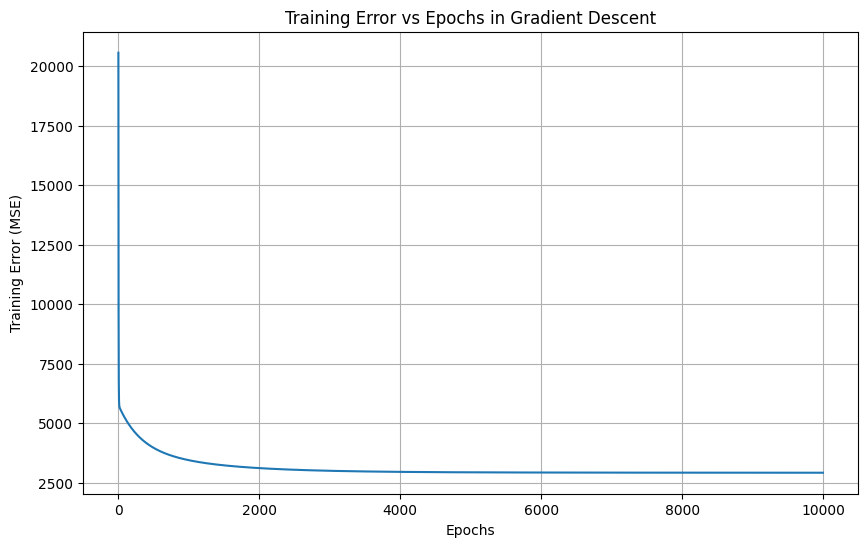


Gradient Descent - Testing Error:  2749.125305005122


In [6]:
def gradient_descent(X, y, learning_rate=0.1, epochs=10000):

    # Initialise all parameters as 0 (with the same dtype as entries of X)
    theta = torch.zeros(X.shape[1], dtype=torch.float64)

    n = X.shape[0]
    errors = []

    # initial_loss = compute_mse(X, y, theta)
    # print("Initial loss (epoch 0):", initial_loss.item())

    # theta_ols = least_squares_solution(X, y)
    # ols_loss = compute_mse(X, y, theta_ols)
    # print("OLS estimator loss:", ols_loss.item())

    # Iterate the gradient descent algorithm through the given number of epochs
    for epoch in range(epochs):

        # Compute the model predictions
        y_pred = X @ theta

        # Compute gradients without autograd
        # If L = 1/N ||X*theta - Y||^2 then grad L = 2/N X^T (X*theta - Y)
        gradients = 2/n * X.T @ (y_pred - y)

        # Update parameters in the direction of steepest descent
        theta = theta - learning_rate * gradients

        # Store the error for each epoch
        error = compute_mse(X, y, theta)
        errors.append(error.item())

    # Return the final parameters theta (we are optimising in the form argmin L(theta))
    # Also return the errors for plotting
    return theta, errors

# Run the gradient descent algorithm
theta_gd, train_errors = gradient_descent(X_train, y_train)

# Compute the testing errors for gradient descent
gd_test_error = compute_mse(X_test, y_test, theta_gd)

# Plot a graph of the training error vs epochs
plt.figure(figsize=(10, 6))
plt.plot(np.arange(0,10000,1), train_errors)
plt.xlabel('Epochs')
plt.ylabel('Training Error (MSE)')
plt.title('Training Error vs Epochs in Gradient Descent')
plt.grid(True)
plt.show()

print()
print("Gradient Descent - Testing Error: ", gd_test_error.item())

The testing error for gradient descent is similar to the testing error for the analytic least squares solution. Since the loss function is convex, gradient descent is guaranteed to converge (to the analytic OLS solution) eventually. The number of epochs is sufficiently large and the learning rate is not too small, and as such the two values are similar. The graph shows that the training error decreases rapidly and then begins to plateau, indicating convergence.

<br>

I attempted to quantify this using Proposition 2.16 on the training set and claim that this generalises to the MSE and the test data, but was unable to make it work:

- First note when $\lambda = 0$, we have $\nabla L(\mathbf{x}) = 2A^T (A\mathbf{x}-\mathbf{b})$ and $\nabla^2 L(x) = 2A^TA$.

- By question 5 in the optimisation questions (section 3), when looking at the training data we have $L(x)$ is $\mu$-strongly convex where $\mu = \frac{2}{N_{\text{train}}} \lambda_{min} (X_{\text{train}}^T X_{\text{train}})$.

- We also know that $L(x)$ is $L$-smooth if all the eigenvalues of $\nabla^2 L(x)$ are less than $L$, and as such $L(x)$ is $\frac{2}{N_{\text{train}}} \lambda_{max} (X_{\text{train}}^T X_{\text{train}})$-smooth.

- On the training dataset these values are $L = 2.000$ and $\mu = 3.9223 \times 10^{-05}$. If a function is $L$-smooth it is also $L'$-smooth for all $L' \geq L$, and as such we have $L(x)$ is $10$-smooth ($10>2$; we get the desired value of $\alpha=\frac{1}{10}=0.1$ for the learning rate).

- By Proposition 2.16 we have that

- $\begin{align}
L(\mathbf{x}_{10000}) - L(\mathbf{x}_\text{OLS}) &\leq \exp(- \frac{\mu}{L'} \cdot 10000) \cdot (L(\mathbf{x}_0) - L(\mathbf{x}_\text{OLS})) \\
&\leq \exp(- \frac{3.9223 \times 10^{-05}}{10} \cdot 10000) \cdot (28903 - 2897) \\
&= 25005
\end{align}$

- However this number is much larger than expected. I was expecting this to be smaller, and claim that this inequality will loosely generalise to the testing data and with the MSE (perhaps using equivalence of norms).

Below is some of the code I used to find these eigenvalues and values of $L(x)$.


In [7]:
def largest_eigenvalue(A):
  eigenvalues, _ = torch.linalg.eig(A)
  return torch.max(torch.abs(eigenvalues))

def smallest_eigenvalue(A):
  eigenvalues, _ = torch.linalg.eig(A)
  return torch.min(torch.abs(eigenvalues))

print(largest_eigenvalue(2/353*X_train.T @ X_train))
print(smallest_eigenvalue(2/353*X_train.T @ X_train))

tensor(2.0000, dtype=torch.float64)
tensor(3.9223e-05, dtype=torch.float64)


In [8]:
L_x0 = torch.mean(y_train**2)
print(L_x0)

y_pred_ols = X_train @ theta_ls
L_xols = compute_mse(X_train, y_train, theta_ls)

print(L_xols)

tensor(28903.1416, dtype=torch.float64)
tensor(2897.8569, dtype=torch.float64)


***
### Question 5 [0.5 point]

$\begin{align}
    \nabla L(x) &= \nabla(||A \mathbf{x} - \mathbf{b}||_2 ^2) +  \nabla(\lambda ||\mathbf{x}||_2 ^2) \\
    &= 2 A^T (A \mathbf{x} - \mathbf{b}) + 2 \lambda \mathbf{x}
\end{align}$

where the first term is the same as in Exercise 3 Q5 and for the second term we have $\partial_{i} (||\mathbf{x}||_2 ^2) = \partial_{i}(x_1^2 + + ... + x_n^2) = 2x_i$.

Solving $\nabla L(x) = 0$ yields

$\begin{align}
    2 A^T (A \mathbf{x} - \mathbf{b}) + 2 \lambda \mathbf{x} = 0 &\iff A^T (A \mathbf{x} - \mathbf{b}) + \lambda \mathbf{x} = 0 \\
    &\iff A^T A \mathbf{x} - A^T \mathbf{b} + \lambda \mathbf{x} = 0 \\
    &\iff (A^T A + \lambda I) \mathbf{x} = A^T \mathbf{b}.
\end{align}$

Note that $A^T A + \lambda I$ always has an inverse for $\lambda \in (0,1]$ since the sum of a positive semidefinite and positive definite matrix is still positive definite, and so we have $\mathbf{x} = (A^T A + \lambda I)^{-1} A^T \mathbf{b}$. In this case $\nabla^2 L(x) = 2 A^T A + 2 \lambda I$. This is independent of $\mathbf{x}$. It is also positive definite, so any stationary point of $L(\mathbf{x})$ is a minimum point. Therefore the analytical solution to the regularised least squares problem is $\mathbf{x} = (A^T A + \lambda I)^{-1} A^T \mathbf{b}$ for $\lambda \in (0,1]$.

Now if $\lambda = 0$ the matrix $A^T A$ also has an inverse if it is of full rank, so the above expression will still hold and we have $\mathbf{x} = (A^T A )^{-1} A^T \mathbf{b}$ . Otherwise, the problem is underdetermined and we cannot find an analytical expression for the exact solution $\mathbf{x}$ (although the least squares problem can still be solved).

***
### Question 6 [0.5 point]

In [9]:
# Read the csv files into pandas dataframes
A_df = pd.read_csv('A.csv',header=None)
b_df = pd.read_csv('b.csv',header=None)

# print(b_df.shape)

# Convert the pandas dataframes into pytorch tensors of float32s
A = torch.tensor(A_df.values, dtype=torch.float32)
b = torch.tensor(b_df.values, dtype=torch.float32)

# print(A.shape)
print(torch.linalg.matrix_rank(A.T @ A))
print(torch.linalg.det(A.T @ A))
print(torch.linalg.cond(A))

tensor(410)
tensor(0.)
tensor(1.5519e+08)


Here we can see that the matrix $A$ (and later $A_\text{train}$) have a high condition number. As such when solving the problem $A^T A \mathbf{x} = A^T \mathbf{b}$ we cannot simply solve the equation $A \mathbf{x} = \mathbf{b}$ with torch.linalg.solve: the system is extremely senstive to perturbations and we might run into numerical instability issues. Therefore we make use of the least squares minimisation problem in PyTorch rather than directly solving this system.

In [10]:
# Redefine the seed for reproducibility
torch.manual_seed(0)

# Split the dataset in a similar way as in q4
perm = torch.randperm(A.shape[0])

train_size = int(0.8 * A.shape[0])
train_indx = perm[:train_size]
test_indx = perm[train_size:]

A_train = A[train_idx]
b_train = b[train_idx]
A_test = A[test_idx]
b_test = b[test_idx]

# We aim to solve the equation in q5 x= (A^TA + lambda*I)^-1A^Tb
# When lambda = 0 this reduces to A^TAx = A^Tb
# We make use of lstsq in torch.linalg to leverage numerically stable methods to solve this least squares problem
# This is because the matrix we are using is ill-conditioned
x_ols = torch.linalg.lstsq(A_train, b_train,driver='gelsd').solution

# Find the error of the OLS estimator on the testing data
# ols_test_error = compute_mse(A_test, b_test, x_ols)

b_pred_test = A_test @ x_ols
ols_test_error = torch.mean((b_test - b_pred_test)**2)

print("OLS estimator - Testing Error: ", ols_test_error.item())

print(torch.linalg.cond(A_train))

OLS estimator - Testing Error:  2.624615247359685e-10
tensor(1392796.8750)


***
### Question 7 [1 point]

In [11]:
# Redefine the seed for reproducibility
torch.manual_seed(0)

def gradient_descent_autograd(X, y, lambda_, learning_rate=0.1, epochs=1000):

    # Initialise all parameters as 0 (with the same dtype as entries of X)
    x_gd = torch.zeros((A_train.shape[1], 1), requires_grad=True)

    # Iterate the gradient descent algorithm through the given number of epochs
    for epoch in range(epochs):

        # Compute the loss L(x) = ||Ax - b||^2 since lambda = 0
        # loss = torch.norm(A_train @ x_gd - b_train, p=2) ** 2
        loss = torch.sum((A_train @ x_gd - b_train) ** 2) + lambda_ * torch.sum(x_gd ** 2)

        # Compute gradients using autograd
        loss.backward()

        # Update parameters in the direction of steepest descent
        # Do not calculate gradients for parameter updates (we only do this for the loss)
        with torch.no_grad():
            x_gd -= learning_rate * x_gd.grad
            x_gd.grad.zero_()

    # Return the final parameters x_gd
    # detach in PyTorch stops gradients from being tracked - we no longer require gradient calculations
    return x_gd.detach()

# Compute test error
x_gd_autograd = gradient_descent_autograd(A_train, b_train, 0)
gd_autograd_test_error = compute_mse(A_test, b_test, x_gd_autograd)
print("Gradient Descent with Autograd - Testing Error: ", gd_autograd_test_error.item())
print("OLS estimator - Testing Error: ", ols_test_error.item())

Gradient Descent with Autograd - Testing Error:  2.3508493995905155e-06
OLS estimator - Testing Error:  2.624615247359685e-10


The testing error using gradient descent with autograd is a factor of $10^4$ greater than the testing error using the analytic OLS solution. The loss is convex again so gradient descent is guaranteed to converge; however the number of epochs may be too low or the learning rate may be too low, causing the gradient descent algorithm to not converge in time.

Since the condition number of both $A$ and $A_\text{train}$ are extremely high ($1.55 \times 10^8$ and $1.39 \times 10^6$ respectively) we make use of the gelsd driver in torch.linalg.lstsq to use numerically stable methods, including tridiagonal reduction and SVD. The high condition number causes the gradient descent testing error to be higher - in order to improve the error one could consider introducing momentum to improve the speed of convergence (due to the square root term).

***
### Question 8 [1 point]

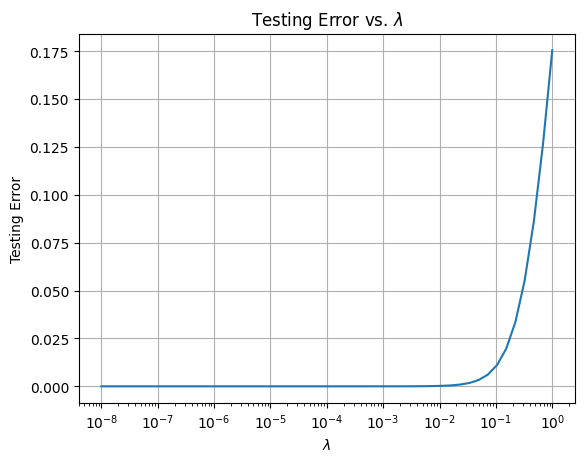

In [12]:
# Redefine the seed for reproducibility
torch.manual_seed(0)

lambdas = np.logspace(-8,0)
testing_errors = np.zeros(lambdas.size)

# Iterate through each lambda value
for i, lamb in enumerate(lambdas):
  # Find the testing error (MSE) for each lambda
  x_gd_autograd = gradient_descent_autograd(A, b, lamb)
  testing_errors[i] = compute_mse(A_test, b_test, x_gd_autograd)

#Plot the graph of error against lambda
plt.plot(lambdas, testing_errors)
plt.xlabel(r'$\lambda$')
plt.ylabel('Testing Error')
plt.title(r'Testing Error vs. $\lambda$')
plt.xscale("log")
plt.grid(True)
plt.show()

We need to choose a small enough value of $\lambda$ such that the testing error is sufficiently small. However, we do not want $\lambda$ to be too small otherwise the penalty introduced by the regularisation is too small. The purpose of the penalty term is to prevent the coefficients being too large, leading to overfitting and poor generalisation. As such a value of lambda of $\approx 10^{-2}$ ensures the testing error is close to the minimum value (if $\lambda$ is greater than the error starts to grows rapidly); reducing $\lambda$ further does not significantly decrease the error. This is an exmaple of bias-variance trade-off: by introducing the penalty/regularisation term we sacrifice the unbiased nature of the estimator but reduce the variance.